# Primer Proyecto Integral

## Introducción

### Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas.

El trabajo cosniste en ayudar a la empresa a tomar decisiones sobre el plan de ventas para el año 2017, con base en la información que se tiene disponible.

### Objetivo del proyecto

- Identificar patrones que determinen si un juego tiene éxito o no.
- Detectar proyectos prometedores y planificar campañas publicitarias.

### Preparar el entorno de trabajo 

Para este proyecto, se trabajará con distintas librerias de Python, como Pandas, NumPy, Matplotlib, Seaborn y Scipy.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st

La base de datos se obtuvo de la siguiente liga: /datasets/games.csv

In [2]:
df = pd.read_csv("/datasets/games.csv")
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Limpieza de los datos 

### Análisis de la base de datos

Lo primero que se debe de realizar es revisar la información general de la base de datos con los que se va a trabajar: la cantidad de filas y columnas, el nombre de las columnas, los tipos de datos de las columnas, la presencia de valores ausentes, etc.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
print(df.duplicated().sum())

0


La base de datos cuenta con 11 columnas, de las cuales 6 son del tipo float y 5 del tipo object, sin embargo algunas columnas habrá que modificarlas para que cuenten con el tipo de dato correcto. Asimismo, se observan 16,715 filas. Se observa que existen valores ausentes en 7 de las 11 columnas. También los nombres de las columnas cuentan con mayúsculas, por lo que será necesario corregir estos aspectos antes de empezar a trabajar con los datos. No se observan valores duplicados en la base de datos.

### Cambio de los títulos de las columnas 

Para modificar los nombres de las columnas, se utilizará un filtro donde se homologarán todos los nombres con las mismas caracteristicas: solo letras minúsculas, no espacios en blanco y guión bajo para separar las palabras.

In [5]:
nuevos_nombres_columnas = []
for nombreviejo in df.columns:
    nombrenuevo = nombreviejo.strip()
    nombrenuevo = nombrenuevo.lower()
    nuevos_nombres_columnas.append(nombrenuevo)
df.columns = nuevos_nombres_columnas

In [6]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Valores ausentes 

#### Columna "name" 

In [7]:
df["name"].isna().sum()

2

In [8]:
df[df["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


La columna cuenta con dos valores ausentes. Observando ambas columnas, nos damos cuenta que posiblemete es el mismo juego, ya que los dos son de la misma plataforma y el mismo año de lanzamiento, además una de las filas habla sobre las ventas en Japón mientras que la otra de las ventas en el resto del mundo. Al ser solo dos valores de la base de datos, se optó por determinar el nombre del juego como "not defined".

In [9]:
df["name"] = df["name"].fillna("Not defined")
df["name"].isna().sum()

0

#### Columna "year_of_release" 

In [10]:
df["year_of_release"].isna().sum()

269

In [11]:
df[df["year_of_release"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


La columna arroja 269 valores ausentes. A diferencia de la columna "names", en este caso las filas son para diferentes videojuegos. Sin embargo, se tratarán los valores de la misma manera, sustituyendo los valores ausentes con un 0. También se transformará el tipo de datos de flotante a entero.

In [12]:
df["year_of_release"] = df["year_of_release"].fillna(0)
df["year_of_release"].isna().sum()

0

In [13]:
df["year_of_release"] = df["year_of_release"].astype("int")

#### Columna "genre" 

In [14]:
df["genre"].isna().sum()

2

In [15]:
df[df["genre"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Not defined,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Not defined,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Los valores ausentes de esta columna coinciden con los de la columna "names". Los valores serán tratados de la misma manera que dicha columna.

In [16]:
df["genre"] = df["genre"].fillna("Not defined")
df["genre"].isna().sum()

0

#### Columna "critic_score" 

In [17]:
df["critic_score"].isna().sum()

8578

In [18]:
df[df["critic_score"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


A diferencia de las columnas anteriores, la columna "critic_score" tiene demasiados valores ausentes, 8,578 que prácticamente son el 50% de los valores. Estos se podrían deber a que los críticos no suelen calificar todos los videojuegos que se estrenan o solo los títulos que más llaman la atencion son los que son calificados. Los valores ausentes de esta columna se sustituirán con un cero.   

In [19]:
df["critic_score"] = df["critic_score"].fillna(0)
df["critic_score"].isna().sum()

0

#### Columna "user_score"

In [20]:
df["user_score"].isna().sum()

6701

In [21]:
df[df["user_score"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,NaN,NaN


La columna "user_score" es de naturaleza similar a la anterior, "critic_score". Se observan 6,701 valores ausentes, no son tantos como la columna de la crítica, aunque si son aproximadamente el 40% de la columna. La razón por la que hay más calificaciones de los usuarios que de los críticos es debido a que los usuarios son los que juegan los videojuegos mas a menudo, por lo que tienen más interacción con ellos, además de que frecuentemente pueden discutir entre ellos y calificar los videojuegos que juegan. Los valores ausentes de esta columna tambien serán reemplazados por cero. Tambien se observa un valor muy curioso: TBD. Este valor también será sustituido por cero.

In [22]:
df["user_score"] = df["user_score"].fillna(0)
df["user_score"].isna().sum()

0

In [23]:
df["user_score"] = df["user_score"].replace("tbd",0)

In [24]:
df["user_score"] = pd.to_numeric(df["user_score"], errors = "raise")

#### Columna "rating

In [25]:
df["rating"].isna().sum()

6766

In [26]:
df[df["rating"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NaN


Por último, la columna "rating" es una columna que clasifica a los videojuegos dependiendo de la audiencia a la que va dirigida, por lo que los datos deben de ser del tipo categóricos. Se observan 6,766 valores ausentes, aproximadamente el 40% de la columna. Primero, los valores ausentes serán sustituidos por la leyenda "unclassified", y posteriormente se convertirá la columna al tipo de datos categóricos.

In [27]:
df["rating"] = df["rating"].fillna("Unclassified")
df["rating"].isna().sum()

0

In [28]:
df["rating"].unique()

array(['E', 'Unclassified', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [29]:
df["rating"] = df["rating"].astype("category")

### Agregar información extra

Por último, se agregará una columna donde se especifiquen las ventas totales por videojuego, sumando las columnas "na_sales", "eu_sales", "jp_sales" y "other_sales". 

In [30]:
df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]

In [31]:
df[["total_sales"]]

,total_sales
0,82.54
1,40.24
2,35.52
3,32.77
4,31.38
...,...
16710,0.01
16711,0.01
16712,0.01
16713,0.01


### Revisión de las correciones

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16715 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16715 non-null  int64   
 3   genre            16715 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     16715 non-null  float64 
 9   user_score       16715 non-null  float64 
 10  rating           16715 non-null  category
 11  total_sales      16715 non-null  float64 
dtypes: category(1), float64(7), int64(1), object(3)
memory usage: 1.4+ MB


Una vez realizadas las correciones pertinentes, podemos observar que la base de datos no cuenta más con valores ausentes, y que la columna "rating" ha sido transformada al tipo de datos categóricos. También se observa que la columna "total_sales" fue creada de manera correcta y no cuenta con valores ausentes. Esto nos indica que podemos empezar a trabajar en el análisis de los datos.

## Análisis de los datos 

### Juegos lanzados por año

In [33]:
juegos_por_año = df[df["year_of_release"]!=0][["platform","genre","year_of_release",]]
juegos_por_año

,platform,genre,year_of_release
0,Wii,Sports,2006
1,NES,Platform,1985
2,Wii,Racing,2008
3,Wii,Sports,2009
4,GB,Role-Playing,1996
...,...,...,...
16710,PS3,Action,2016
16711,X360,Sports,2006
16712,PSV,Adventure,2016
16713,GBA,Platform,2003


In [34]:
juegos_por_año_agrupados = juegos_por_año.groupby("year_of_release")[["year_of_release"]].count()
juegos_por_año_agrupados

,year_of_release
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


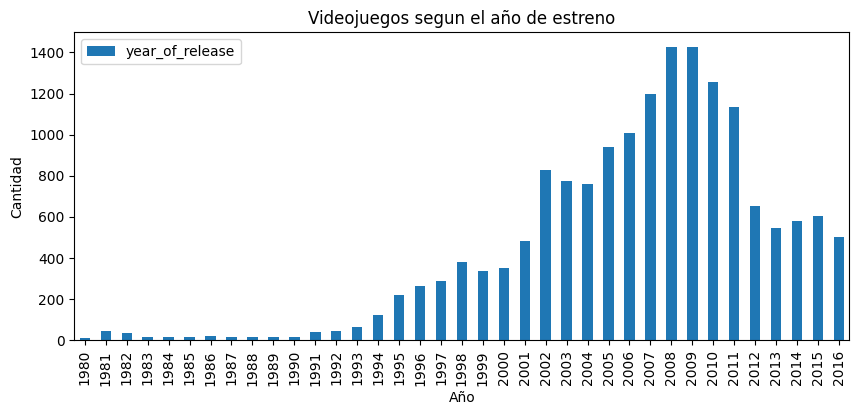

In [35]:
juegos_por_año_agrupados.plot(kind = "bar",
                             title = "Videojuegos segun el año de estreno",
                             xlabel = "Año",
                             ylabel = "Cantidad",
                             figsize = [10,4])
plt.show()

Los datos de videojuegos estrenados por año parecen ser significativos. Se observa que en los primeros años, la cantidad de juegos estrenados no fue demasiada, sobretodo por lo caro y complicado que era programar y crear un videojuego. Sin embargo, conforme avanza el tiempo, se observa un incremento en la cantidad de juegos fabricados. Resulta interesante observar que el año donde hubo mayor cantidad de juegos fabricados fue entre el 2006 y el 2011, año donde las grandes empresas ya tenían múltipes consolas en el mercado, ya que fue un periodo donde existió un boom en el mercado de los videojuegos.

###  Variación de las ventas segun la plataforma

In [36]:
juegos_por_ventas_segun_consola = df.groupby("platform")[["na_sales","eu_sales","jp_sales","other_sales","total_sales"]].sum()
juegos_por_ventas_segun_consola = juegos_por_ventas_segun_consola.reset_index()
juegos_por_ventas_segun_consola

,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,2600,90.60,5.47,0.00,0.91,96.98
1,3DO,0.00,0.00,0.10,0.00,0.10
2,3DS,83.49,61.48,100.67,13.36,259.00
3,DC,5.43,1.69,8.56,0.27,15.95
4,DS,382.40,188.89,175.57,59.26,806.12
5,GB,114.32,47.82,85.12,8.20,255.46
6,GBA,187.54,75.25,47.33,7.73,317.85
7,GC,133.46,38.71,21.58,5.18,198.93
8,GEN,21.05,6.05,2.70,0.97,30.77
9,GG,0.00,0.00,0.04,0.00,0.04


In [37]:
consolas_mayores_ventas = juegos_por_ventas_segun_consola[juegos_por_ventas_segun_consola["total_sales"]>50][["platform","na_sales","eu_sales","jp_sales","other_sales","total_sales"]]
consolas_mayores_ventas

,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,2600,90.60,5.47,0.00,0.91,96.98
2,3DS,83.49,61.48,100.67,13.36,259.00
4,DS,382.40,188.89,175.57,59.26,806.12
5,GB,114.32,47.82,85.12,8.20,255.46
6,GBA,187.54,75.25,47.33,7.73,317.85
7,GC,133.46,38.71,21.58,5.18,198.93
10,N64,139.02,41.06,34.22,4.38,218.68
11,NES,125.94,21.15,98.65,5.31,251.05
13,PC,94.53,142.44,0.17,22.38,259.52
15,PS,336.52,213.61,139.82,40.91,730.86


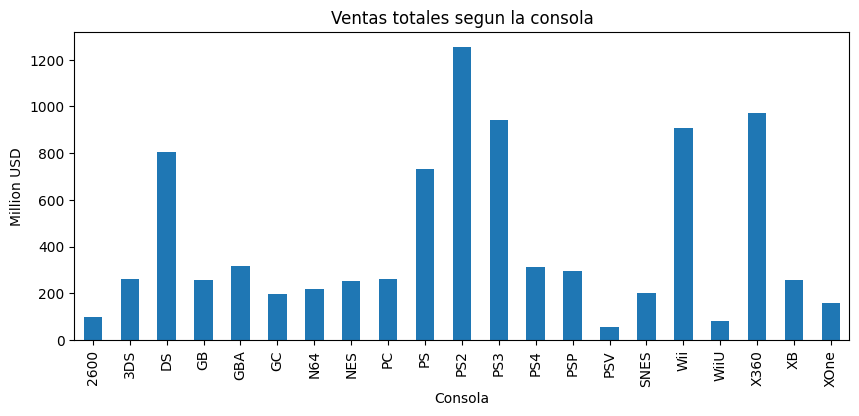

In [38]:
consolas_mayores_ventas.plot(kind = "bar",
                            x = "platform",
                            y = "total_sales",
                            title = "Ventas totales segun la consola",
                            xlabel = "Consola",
                            ylabel = "Million USD",
                            legend = False,
                            figsize = [10,4])
plt.show()

Podemos observar que las consolas que mayores ingresos generaron fueron Play Station 2 (PS2), Xbox 360 (X360), Play Station 3 (PS3), Wii (Wii), Nintendo DS (DS) y Play Station (PS).

In [39]:
consolas_ventas_segun_año = df.groupby(["platform","year_of_release"])[["na_sales","eu_sales","jp_sales","other_sales","total_sales"]].sum()
consolas_ventas_segun_año = consolas_ventas_segun_año.reset_index()
consolas_ventas_segun_año = consolas_ventas_segun_año.drop(consolas_ventas_segun_año[consolas_ventas_segun_año["year_of_release"]==0].index)
consolas_ventas_segun_año

,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales
1,2600,1980,10.59,0.67,0.00,0.12,11.38
2,2600,1981,33.40,1.96,0.00,0.32,35.68
3,2600,1982,26.92,1.65,0.00,0.31,28.88
4,2600,1983,5.44,0.34,0.00,0.06,5.84
5,2600,1984,0.26,0.01,0.00,0.00,0.27
...,...,...,...,...,...,...,...
249,XB,2008,0.13,0.04,0.00,0.01,0.18
250,XOne,2013,11.85,5.34,0.02,1.75,18.96
251,XOne,2014,30.97,18.15,0.14,4.81,54.07
252,XOne,2015,36.03,18.47,0.17,5.47,60.14


In [40]:
tabla_dinamica_consolas_ventas_segun_año = consolas_ventas_segun_año.pivot_table(index = "year_of_release",
                                                                                columns = "platform",
                                                                                values = "total_sales")
tabla_dinamica_consolas_ventas_segun_año = tabla_dinamica_consolas_ventas_segun_año.reset_index()
tabla_dinamica_consolas_ventas_segun_año

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1989,0.63,NaN,NaN,NaN,NaN,64.97,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


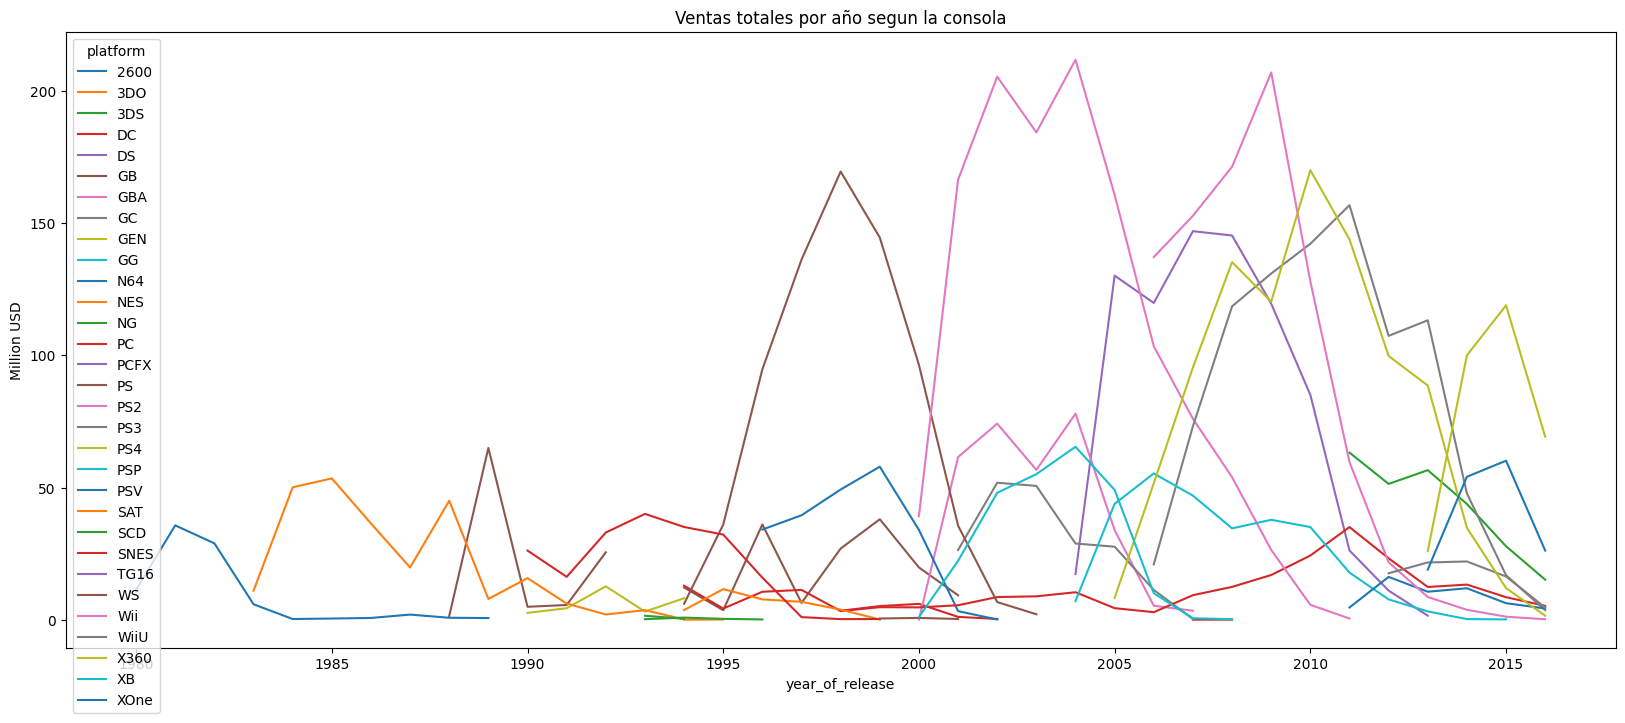

In [41]:
tabla_dinamica_consolas_ventas_segun_año.plot(kind = "line",
                               x = "year_of_release",
                            title = "Ventas totales por año segun la consola",
                            ylabel = "Million USD",
                            figsize = [20,8])
plt.show()

Observando la tabla dinámica y la gráfica de lineas, se puede observar el periodo en el que cada consola estuvo de venta en el mercado, asi como tambien cuando obtuvo mayores ganancias. Como conclusiones podemos deducir lo siguiente:
- El promedio de vida de una consola en el mercado es entre 8 y 10 años.
- Las consolas alcanzan su punto más alto en cuanto a ventas a la mitad del periodo de vida de la misma.
- Por lo general, las consolas tienen entre 1 y 3 años en los que obtienen ingresos extraordinarios. Los demas años son de colocación en el mercado y de sustitución por una consola más moderna.

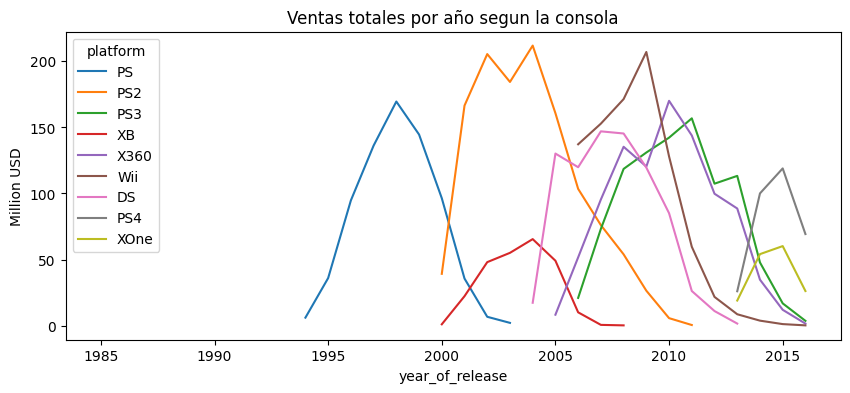

In [42]:
tabla_dinamica_consolas_ventas_segun_año.plot(kind = "line",
                               x = "year_of_release",
                                              y = ["PS","PS2","PS3","XB","X360","Wii","DS","PS4","XOne"],
                            title = "Ventas totales por año segun la consola",
                            ylabel = "Million USD",
                            figsize = [10,4])
plt.show()

Observando las consolas más exitosas en cuanto a ventas de videojuegos, vemos que todas (salvo el Play Station o PS) se estrenaron a partir del año 2000.

### Nueva base de datos

Para realizar las proyecciones para el 2017, se filtrará la base de datos para poder tener estimaciones más acertadas. Los datos anteriores al año 2000 serán eliminados ya que, por un lado estan alejados de la fecha que se desea proyectar y pueden sesgar un poco los datos, y por otro lado, como se observó en la útlima gráfica de lineas, las consolas más exitosas han sido las que han tenido ventas a partir del año 2000. La única consola de la que se tomarán datos anterior al 2000 serán del Play Station (PS) debido a que fue la primera consola en tener un éxito sobresaliente en cuanto a ventas de videojuegos. 

In [43]:
nuevo_df1 = df[df["platform"]=="PS"][['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales',"total_sales", 'critic_score', 'user_score', 'rating']]
nuevo_df2 = df[(df["platform"]!="PS")&(df["year_of_release"]>=2000)][['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales',"total_sales", 'critic_score', 'user_score', 'rating']]
nuevo_df = pd.concat([nuevo_df1,nuevo_df2])
nuevo_df = nuevo_df.reset_index(drop=True)
nuevo_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Gran Turismo,PS,1997,Racing,4.02,3.87,2.54,0.52,10.95,96.0,8.7,E
1,Final Fantasy VII,PS,1997,Role-Playing,3.01,2.47,3.28,0.96,9.72,92.0,9.2,T
2,Gran Turismo 2,PS,1999,Racing,3.88,3.42,1.69,0.50,9.49,93.0,9.0,T
3,Final Fantasy VIII,PS,1999,Role-Playing,2.28,1.72,3.63,0.23,7.86,90.0,8.6,T
4,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,3.78,2.17,1.31,0.31,7.57,0.0,0.0,Unclassified
...,...,...,...,...,...,...,...,...,...,...,...,...
15388,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,0.0,0.0,Unclassified
15389,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,0.0,0.0,Unclassified
15390,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,0.0,0.0,Unclassified
15391,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,0.0,0.0,Unclassified


### Consolas líderes en ventas

In [44]:
consolas_lideres_en_ventas = nuevo_df.groupby("platform")[["na_sales","eu_sales","jp_sales","other_sales","total_sales"]].sum()
consolas_lideres_en_ventas

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
3DS,82.65,61.27,100.62,13.27,257.81
DC,2.53,0.79,3.96,0.13,7.41
DS,380.31,188.41,175.00,59.04,802.76
GB,9.12,5.19,13.01,1.68,29.00
GBA,184.12,74.59,46.56,7.61,312.88
GC,131.94,38.32,21.34,5.13,196.73
N64,21.88,6.13,8.25,1.04,37.30
PC,63.93,121.34,0.08,20.37,205.72
PS,336.52,213.61,139.82,40.91,730.86


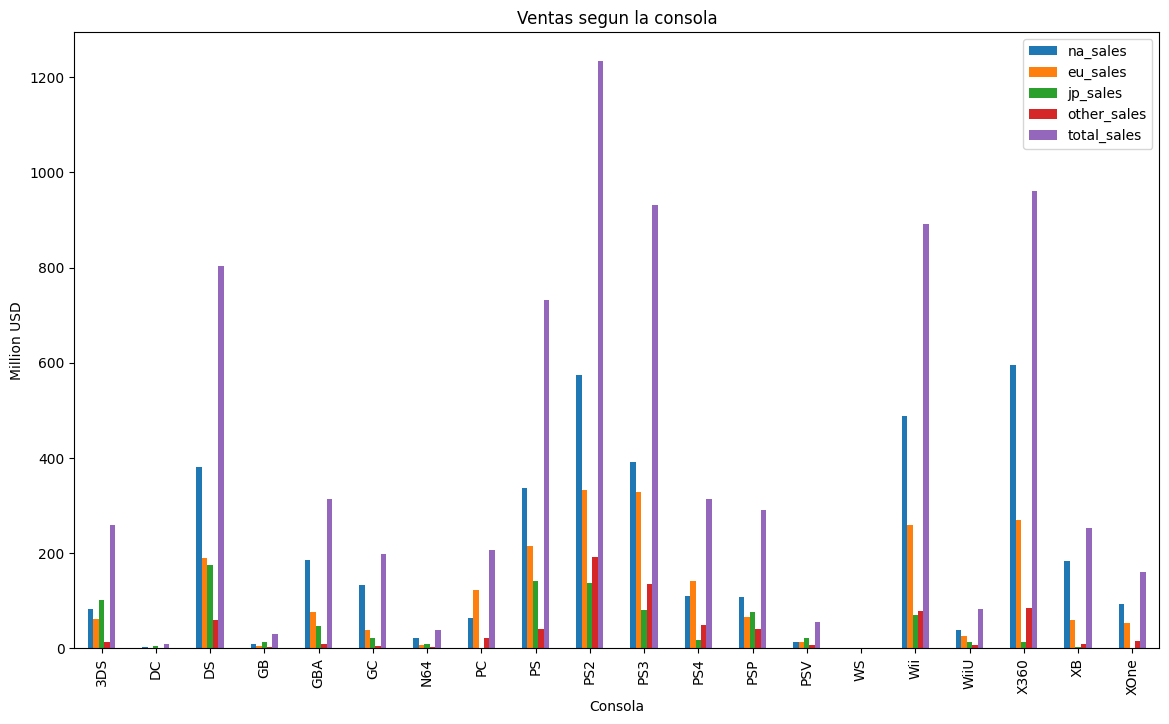

In [45]:
consolas_lideres_en_ventas.plot(kind = "bar",
                               title = "Ventas segun la consola",
                               xlabel ="Consola",
                               ylabel = "Million USD",
                               figsize = [14,8])
plt.show()

La gráfica de barras nos muestra cuales son las consolas con mayor cantidad de ventas. Se puede observar que las consolas que sobresalen con mayores ventas son Play Station 2 (PS2), Xbox 360 (X360), Play Station 3 (PS3), Wii (Wii), Nintendo DS (DS) y Play Station (PS). Por el contrario, consolas como Dreamcast (DC), Gameboy (GB), Nintendo 64 (N64), Play Station Vita (PSV), Wonderswan (WS) y Wii U (WiiU) resaltan por ser las que menos ventas generaron. 

Por tanto, las plataformas más rentables son las siguientes:
- Play Station 2 (PS2)
- Xbox 360 (X360)
- Play Station 3 (PS3)
- Wii (Wii)
- Nintendo DS (DS)
- Play Station (PS)

In [46]:
tabla_dinamica_ventas_segun_consola = nuevo_df.pivot_table(index = "name",
                                                           columns = "platform",
                                                           values = "total_sales")
tabla_dinamica_ventas_segun_consola.drop(["3DS","DC","GB","GBA","GC","N64","PC","PSP","PSV","WiiU","XOne","XB","PS4","WS"],axis = "columns")

platform,DS,PS,PS2,PS3,Wii,X360
name,,,,,,
Beyblade Burst,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,0.51,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,NaN,NaN,NaN,NaN,NaN,NaN
Tales of Xillia 2,NaN,NaN,NaN,0.84,NaN,NaN
...,...,...,...,...,...,...
thinkSMART FAMILY!,NaN,NaN,NaN,NaN,0.03,NaN
thinkSMART: Chess for Kids,0.01,NaN,NaN,NaN,NaN,NaN
uDraw Studio,NaN,NaN,NaN,NaN,2.42,NaN


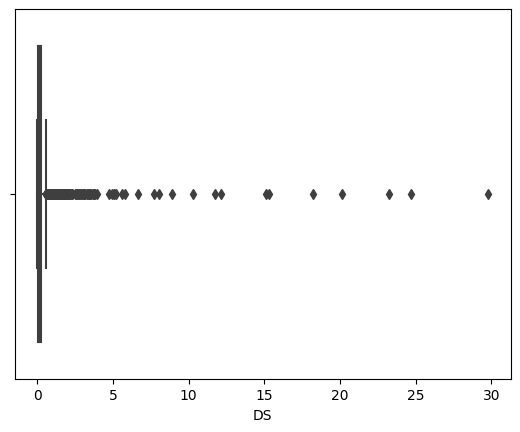

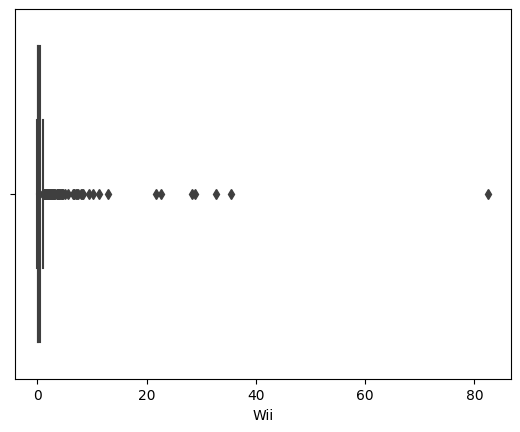

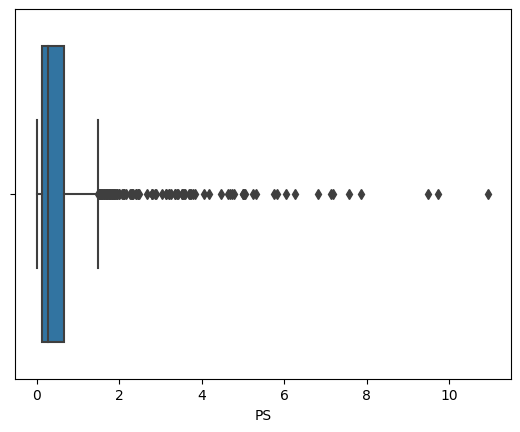

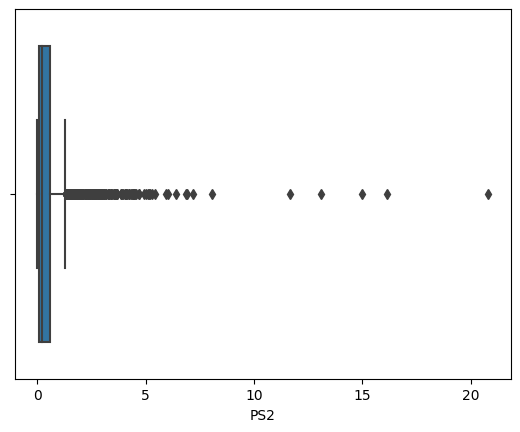

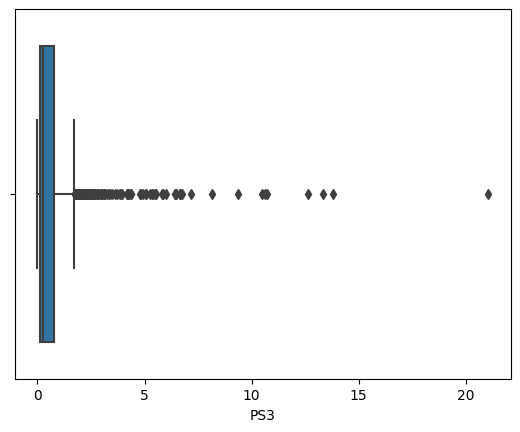

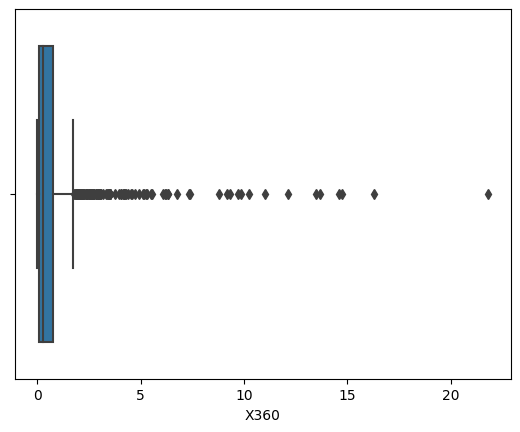

In [47]:
sns.boxplot(tabla_dinamica_ventas_segun_consola["DS"])
plt.show()
sns.boxplot(tabla_dinamica_ventas_segun_consola["Wii"])
plt.show()
sns.boxplot(tabla_dinamica_ventas_segun_consola["PS"])
plt.show()
sns.boxplot(tabla_dinamica_ventas_segun_consola["PS2"])
plt.show()
sns.boxplot(tabla_dinamica_ventas_segun_consola["PS3"])
plt.show()
sns.boxplot(tabla_dinamica_ventas_segun_consola["X360"])
plt.show()

In [48]:
tabla_dinamica_ventas_segun_consola.describe()

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
count,512.000000,31.000000,2120.000000,27.000000,811.000000,542.000000,70.000000,916.000000,1197.000000,2127.000000,1305.000000,392.000000,1193.000000,429.000000,4.00000,1286.000000,147.000000,1231.000000,803.000000,247.000000
mean,0.503535,0.239032,0.378660,1.074074,0.385795,0.362970,0.532857,0.224383,0.610576,0.579953,0.712686,0.801378,0.242691,0.125431,0.24000,0.692986,0.559116,0.779720,0.313288,0.645020
std,1.441271,0.389875,1.436359,1.304525,0.899654,0.693974,0.729423,0.593468,1.054502,1.138461,1.402625,1.609456,0.522019,0.212341,0.20166,3.165022,1.058836,1.632676,0.539309,1.036139
min,0.010000,0.020000,0.010000,0.070000,0.010000,0.010000,0.010000,0.010000,0.010000,0.000000,0.000000,0.010000,0.010000,0.010000,0.03000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.050000,0.065000,0.050000,0.170000,0.055000,0.060000,0.112500,0.020000,0.110000,0.080000,0.110000,0.060000,0.030000,0.020000,0.13500,0.090000,0.080000,0.110000,0.060000,0.060000
50%,0.120000,0.120000,0.110000,0.810000,0.160000,0.150000,0.220000,0.040000,0.260000,0.230000,0.280000,0.200000,0.090000,0.050000,0.21000,0.190000,0.220000,0.280000,0.150000,0.220000
75%,0.332500,0.195000,0.270000,1.645000,0.390000,0.367500,0.487500,0.152500,0.660000,0.560000,0.760000,0.730000,0.230000,0.130000,0.31500,0.487500,0.525000,0.770000,0.340000,0.685000
max,14.600000,1.810000,29.800000,6.390000,15.840000,7.060000,3.360000,8.010000,10.950000,20.810000,21.050000,14.630000,7.680000,1.960000,0.51000,82.540000,7.090000,21.820000,8.480000,7.390000


Obsevando los estadísticos de cada una de las ventas de las consolas, obtenemos información muy interesante:
- En promedio, la consola que más ganancias obtuvo por venta de videojuegos fue el GameBoy (GB) con 1.07 millones de dólares.
- La consola en la cual las ganancias variaron más por venta de videojuegos fue el Wii (Wii) con una desviación estandar de 3.16 millones de dólares.
- La consola que obtuvo mayores ganancias de un videojuego fue el Wii (Wii) con 82.45 millones de dólares.
- La consola que más videojuegos vendió fue el Nintendo DS (DS) con 2,120 títulos producidos. 

En general, tambien podemos deducir que:
- En promedio, es dificil que un videojuego supere el millon de dólares en ventas.
- El 75% de los juegos que una consola vende no generan más de $750,000 dolares (salvo en algunas consolas como Game Boy, Play Station 3 o Xbox 360)
- Mientras más titulos haya producido la consola, la desviación estandar de las ventas por título incrementa significativamente, como es el caso del Play Station 3 (títulos = 1,305 y sd = 1.40), Wii (títulos = 1,286 y sd = 3.16). Play Station 2 (títulos = 2,127 y sd = 1.13), Nintendo DS (títulos = 2,120 y sd = 1.43) y Xbox 360 (títulos = 1,231 y sd = 1.63) 
- Existen juego que son éxitos rotundos y que pueden generar millones de dolares en ganancias, pero estos son casos extraordinarios.
- Las consolas más nuevas (Play Station 4, Xbox One y Wii U) tienen un comportamiento diferente a las demás consolas, ya que a pesar de no tenen muchos títulos producidos, si cuentan con una desviación estandar por encima de la media. 

###  Ventas según la críticas de los usuarios y los expertos

In [49]:
ventas_segun_la_critica = nuevo_df[(nuevo_df["critic_score"]!=0)&(nuevo_df["user_score"]!=0)][['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales',"total_sales", 'critic_score', 'user_score', 'rating']]
ventas_segun_la_critica

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Gran Turismo,PS,1997,Racing,4.02,3.87,2.54,0.52,10.95,96.0,8.7,E
1,Final Fantasy VII,PS,1997,Role-Playing,3.01,2.47,3.28,0.96,9.72,92.0,9.2,T
2,Gran Turismo 2,PS,1999,Racing,3.88,3.42,1.69,0.50,9.49,93.0,9.0,T
3,Final Fantasy VIII,PS,1999,Role-Playing,2.28,1.72,3.63,0.23,7.86,90.0,8.6,T
5,Tekken 3,PS,1998,Fighting,3.27,2.22,1.40,0.29,7.18,96.0,9.1,T
...,...,...,...,...,...,...,...,...,...,...,...,...
15353,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,0.01,0.00,0.00,0.00,0.01,81.0,8.8,M
15371,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,0.01,80.0,7.6,M
15374,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,0.01,61.0,5.8,T
15380,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,0.01,60.0,7.2,E10+


Como existían demasiadas observaciones donde no había una crítica por parte de los usuarios o expertos, se eliminaron las dichas filas para poder realizar estimaciones sin problemas o sesgos.

#### Correlación entre las ventas y las criticas para el Play Station 2

In [50]:
relacion_ventas_criticas_ps2 = ventas_segun_la_critica[ventas_segun_la_critica["platform"]=="PS2"][["total_sales","critic_score","user_score"]]
relacion_ventas_criticas_ps2

,total_sales,critic_score,user_score
1209,20.81,95.0,9.0
1213,16.15,95.0,8.7
1217,14.97,95.0,8.4
1226,13.10,97.0,8.5
1235,11.65,89.0,8.5
...,...,...,...
14719,0.02,58.0,8.7
14756,0.02,67.0,7.9
14984,0.01,80.0,8.1
15117,0.01,70.0,9.2


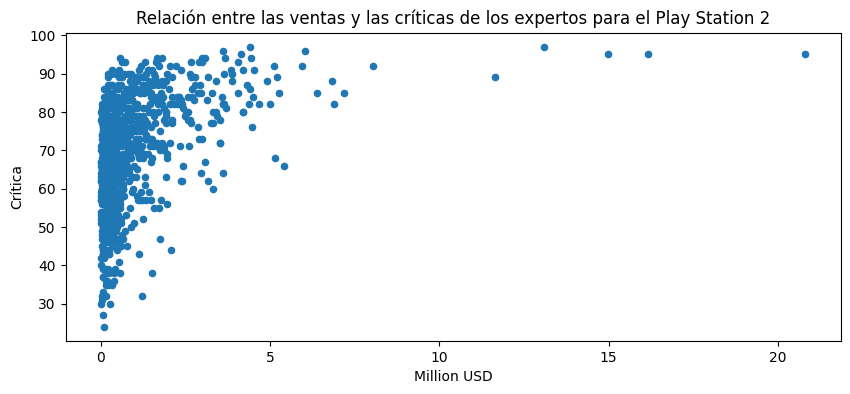

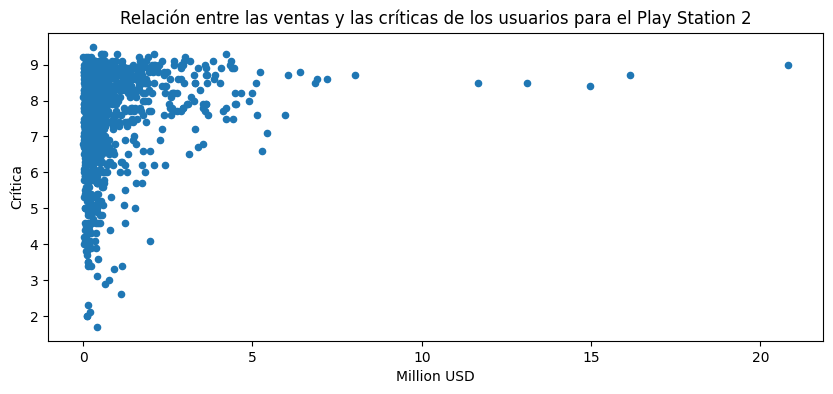

In [51]:
relacion_ventas_criticas_ps2.plot(kind = "scatter",
                                 x = "total_sales",
                                 y = "critic_score",
                                 title = "Relación entre las ventas y las críticas de los expertos para el Play Station 2",
                                 xlabel = "Million USD",
                                 ylabel = "Crítica",
                                 figsize = [10,4])
plt.show()
relacion_ventas_criticas_ps2.plot(kind = "scatter",
                                 x = "total_sales",
                                 y = "user_score",
                                 title = "Relación entre las ventas y las críticas de los usuarios para el Play Station 2",
                                 xlabel = "Million USD",
                                 ylabel = "Crítica",
                                 figsize = [10,4])
plt.show()

In [52]:
corr_ps2_total_sales_critic_score = relacion_ventas_criticas_ps2["total_sales"].corr(relacion_ventas_criticas_ps2["critic_score"])
corr_ps2_total_sales_user_score = relacion_ventas_criticas_ps2["total_sales"].corr(relacion_ventas_criticas_ps2["user_score"])
print("Correlación entre las ventas y la crítica de los expertos: " + str(corr_ps2_total_sales_critic_score))
print("Correlación entre las ventas y la crítica de los usuarios: " + str(corr_ps2_total_sales_user_score))

Correlación entre las ventas y la crítica de los expertos: 0.3864151028406
Correlación entre las ventas y la crítica de los usuarios: 0.17168986651472434


#### Correlación entre las ventas y las críticas para el Xbox 360

In [53]:
relacion_ventas_criticas_x360 = ventas_segun_la_critica[ventas_segun_la_critica["platform"]=="X360"][["total_sales","critic_score","user_score"]]
relacion_ventas_criticas_x360

,total_sales,critic_score,user_score
1206,21.82,61.0,6.3
1212,16.27,97.0,8.1
1218,14.73,88.0,3.4
1220,14.62,87.0,6.3
1223,13.68,83.0,4.8
...,...,...,...
14343,0.02,64.0,7.6
14355,0.02,62.0,7.3
14466,0.02,75.0,6.9
15005,0.01,77.0,8.2


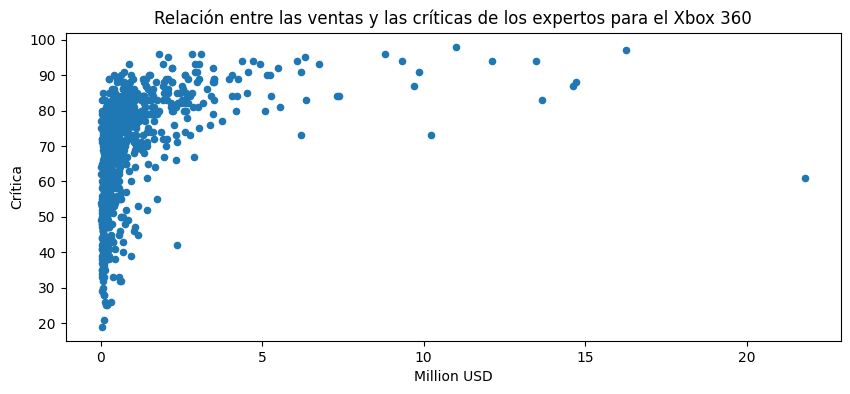

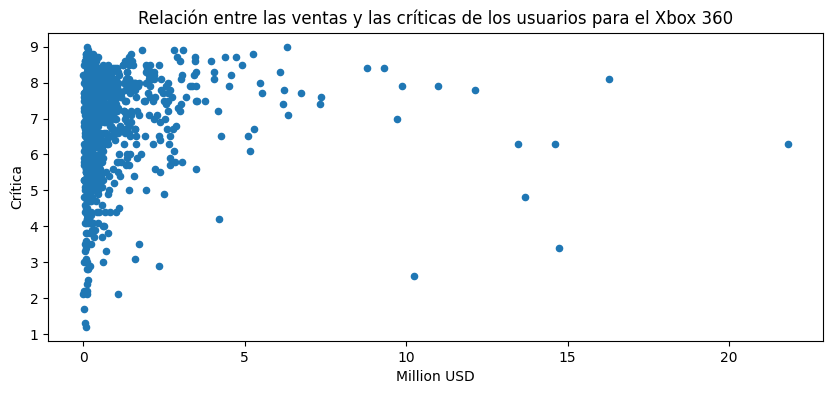

In [54]:
relacion_ventas_criticas_x360.plot(kind = "scatter",
                                 x = "total_sales",
                                 y = "critic_score",
                                 title = "Relación entre las ventas y las críticas de los expertos para el Xbox 360",
                                 xlabel = "Million USD",
                                 ylabel = "Crítica",
                                 figsize = [10,4])
plt.show()
relacion_ventas_criticas_x360.plot(kind = "scatter",
                                 x = "total_sales",
                                 y = "user_score",
                                 title = "Relación entre las ventas y las críticas de los usuarios para el Xbox 360",
                                 xlabel = "Million USD",
                                 ylabel = "Crítica",
                                 figsize = [10,4])
plt.show()

In [55]:
corr_x360_total_sales_critic_score = relacion_ventas_criticas_x360["total_sales"].corr(relacion_ventas_criticas_x360["critic_score"])
corr_x360_total_sales_user_score = relacion_ventas_criticas_x360["total_sales"].corr(relacion_ventas_criticas_x360["user_score"])
print("Correlación entre las ventas y la crítica de los expertos: " + str(corr_x360_total_sales_critic_score))
print("Correlación entre las ventas y la crítica de los usuarios: " + str(corr_x360_total_sales_user_score))

Correlación entre las ventas y la crítica de los expertos: 0.3889921155786253
Correlación entre las ventas y la crítica de los usuarios: 0.11027967172869052


#### Correlación entre las ventas y las críticas para el Wii

In [56]:
relacion_ventas_criticas_wii = ventas_segun_la_critica[ventas_segun_la_critica["platform"]=="Wii"][["total_sales","critic_score","user_score"]]
relacion_ventas_criticas_wii

,total_sales,critic_score,user_score
1197,82.54,76.0,8.0
1198,35.52,82.0,8.3
1199,32.77,80.0,8.0
1201,28.91,58.0,6.6
1202,28.32,87.0,8.4
...,...,...,...
13881,0.02,35.0,4.0
13923,0.02,62.0,6.4
14091,0.02,19.0,2.8
14445,0.02,40.0,4.3


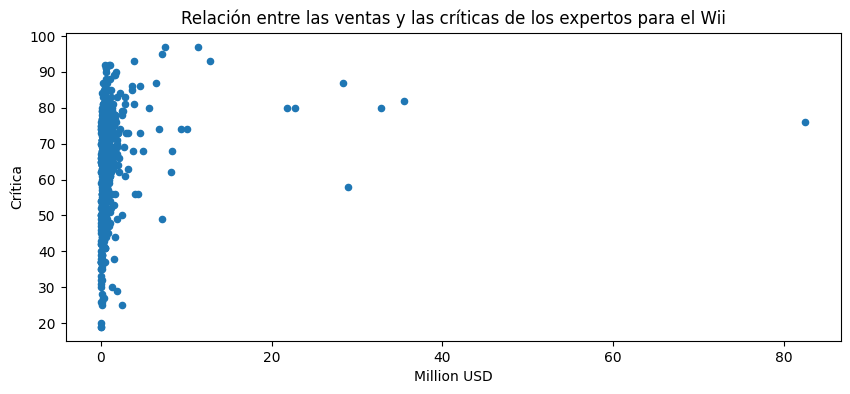

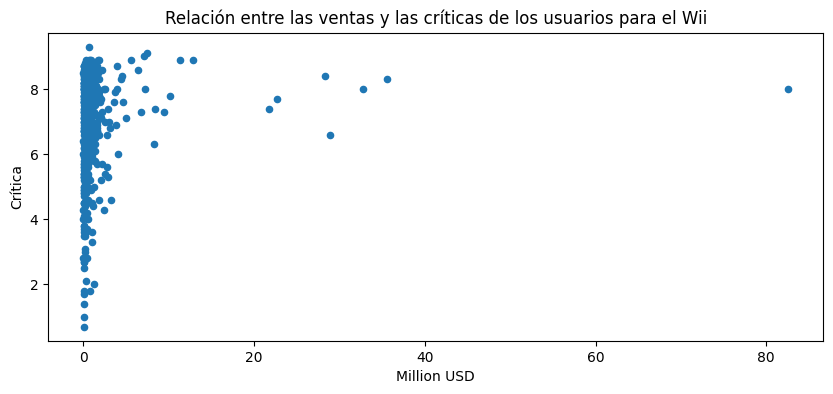

In [57]:
relacion_ventas_criticas_wii.plot(kind = "scatter",
                                 x = "total_sales",
                                 y = "critic_score",
                                 title = "Relación entre las ventas y las críticas de los expertos para el Wii",
                                 xlabel = "Million USD",
                                 ylabel = "Crítica",
                                 figsize = [10,4])
plt.show()
relacion_ventas_criticas_wii.plot(kind = "scatter",
                                 x = "total_sales",
                                 y = "user_score",
                                 title = "Relación entre las ventas y las críticas de los usuarios para el Wii",
                                 xlabel = "Million USD",
                                 ylabel = "Crítica",
                                 figsize = [10,4])
plt.show()

In [58]:
corr_wii_total_sales_critic_score = relacion_ventas_criticas_wii["total_sales"].corr(relacion_ventas_criticas_wii["critic_score"])
corr_wii_total_sales_user_score = relacion_ventas_criticas_wii["total_sales"].corr(relacion_ventas_criticas_wii["user_score"])
print("Correlación entre las ventas y la crítica de los expertos: " + str(corr_wii_total_sales_critic_score))
print("Correlación entre las ventas y la crítica de los usuarios: " + str(corr_wii_total_sales_user_score))

Correlación entre las ventas y la crítica de los expertos: 0.17085459105550813
Correlación entre las ventas y la crítica de los usuarios: 0.11063675382808998


#### Concluiones sobre la correlación entre las ventas y la crítica 

Para las tres consolas analizadas (Play Station 2, Xbox 360 y Wii) se puede concluir que existe una ligera correlación positiva entre las ventas generadas y la crítica de los expertos, siendo esta más fuerte para las consolas Play Station 2 y Xbox 360 (ligeramente ingerior al 40%), mientras que para el Wii es menor (por debajo del 20%).

Con respecto a la correlación entre las ventas generadas y la crítica de los usuarios, se detectó una muy pequeña correlación, apenas menor al 20% para el Play Station 2 y menor al 15% para el Xbox 360 y el Wii.

Por ende, se podría asumir que la crítica de los expertos tiene mayor peso que la crítica de los usuarios en las ventas totales de un videojuego: Sin embargo, esta correlación no es lo suficientemente fuerte para ser un factor clave.

### Videojuegos vendidos en más de una consola

In [59]:
videojuegos = nuevo_df["name"].value_counts()
videojuegos_multiplataforma = videojuegos[videojuegos>1]
videojuegos_multiplataforma = videojuegos_multiplataforma.reset_index()
videojuegos_multiplataforma

,index,name
0,Need for Speed: Most Wanted,12
1,Ratatouille,9
2,FIFA 14,9
3,LEGO Marvel Super Heroes,9
4,LEGO Jurassic World,8
...,...,...
2577,Constantine,2
2578,NASCAR The Game: Inside Line,2
2579,BlowOut,2
2580,Silent Hill: Downpour,2


In [60]:
datos_videojuegos_multiplataforma = nuevo_df[nuevo_df["name"].isin(videojuegos_multiplataforma["index"])][['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales',"total_sales", 'critic_score', 'user_score', 'rating']]  
datos_videojuegos_multiplataforma

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
9,Metal Gear Solid,PS,1998,Action,3.18,1.83,0.78,0.24,6.03,94.0,9.4,M
10,Resident Evil 2,PS,1998,Action,1.88,1.47,2.02,0.45,5.82,89.0,9.2,M
14,Resident Evil,PS,1996,Action,2.05,1.16,1.11,0.73,5.05,91.0,9.0,M
15,Tony Hawk's Pro Skater,PS,1999,Sports,3.42,1.38,0.02,0.20,5.02,92.0,9.2,T
20,Tony Hawk's Pro Skater 2,PS,2000,Sports,3.05,1.41,0.02,0.20,4.68,98.0,7.7,T
...,...,...,...,...,...,...,...,...,...,...,...,...
15384,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,0.01,0.0,0.0,T
15387,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,0.00,0.0,0.0,Unclassified
15388,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,0.0,0.0,Unclassified
15391,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,0.0,0.0,Unclassified


In [61]:
tabla_dinamica_videojuegos_multiplataforma = datos_videojuegos_multiplataforma.pivot_table(index = "name",
                                                                                           columns = "platform",
                                                                                           values = "total_sales")
tabla_dinamica_videojuegos_multiplataforma

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
name,,,,,,,,,,,,,,,,,,,
Frozen: Olaf's Quest,0.59,NaN,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007: Quantum of Solace,NaN,NaN,0.13,NaN,NaN,NaN,NaN,0.02,NaN,0.43,1.15,NaN,NaN,NaN,0.65,NaN,1.48,NaN,NaN
007: The World is not Enough,NaN,NaN,NaN,NaN,NaN,NaN,1.56,NaN,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11eyes: CrossOver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,0.02,NaN,NaN
18 Wheeler: American Pro Trucker,NaN,NaN,NaN,NaN,NaN,0.11,NaN,NaN,NaN,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iCarly,NaN,NaN,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.45,NaN,NaN,NaN,NaN
iCarly 2: iJoin The Click!,NaN,NaN,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,NaN
nail'd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,NaN,0.11,NaN,NaN


Existen 2,582 títulos que salieron a la venta para más de una consola. 

###  Relación entre ventas y géneros

In [62]:
ventas_por_genero = nuevo_df.groupby("genre")[["total_sales"]].sum()
ventas_por_genero

,total_sales
genre,
Action,1621.07
Adventure,199.71
Fighting,371.91
Misc,750.86
Platform,550.29
Puzzle,149.30
Racing,653.00
Role-Playing,792.84
Shooter,942.90


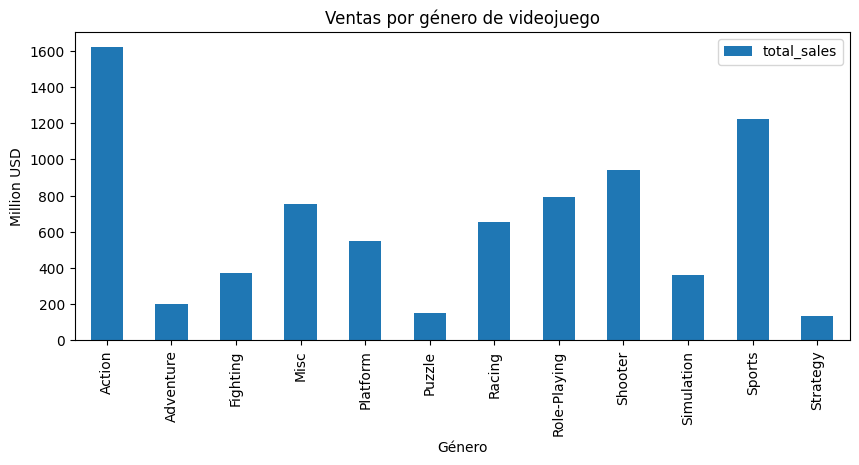

In [63]:
ventas_por_genero.plot(kind = "bar",
                      title = "Ventas por género de videojuego",
                      xlabel = "Género",
                       ylabel = "Million USD",
                       figsize = [10,4])
plt.show()

Podemos observar que los géneros que más ganancias generan son acción, deportes y shooters. Los generos menos rentables son el de estrategia, acertijos y aventura. 

In [64]:
nuevo_df = nuevo_df.sort_values("total_sales", ascending = False)
nuevo_df.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1197,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1198,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
1199,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
1200,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,29.80,89.0,8.5,E
1201,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,28.91,58.0,6.6,E
1202,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,28.32,87.0,8.4,E
1203,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,24.67,0.0,0.0,Unclassified
1204,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,23.21,91.0,8.6,E
1205,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,22.70,80.0,7.7,E
1206,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,21.82,61.0,6.3,E


Tomando en cuenta los veinte juegos que más ganancias generaron, formaron parte de las siguientes categorias:
- Sports: 4
- Racing: 2
- Platform: 2
- Misc: 3
- Simulation: 1
- Action: 4
- Role Playing: 3
- Puzzle: 1

Se puede observar que ocho de los veinte juegos entran en las categorias más exitosas en cuanto a ventas. Sin embargo, tambien se puede observar que hay un juego que pertenece a las categorias que menos ventas generaron. Por lo tanto no se puede asegurar que un juego por pertenecer a una categoría será exitoso en cuanto a ventas.

## Manipulación de los datos 

### Perfiles de usuario para cada región 

#### Norteamérica (NA)

##### Principales plataformas

In [65]:
consolas_na = nuevo_df.groupby("platform")[["na_sales"]].sum()

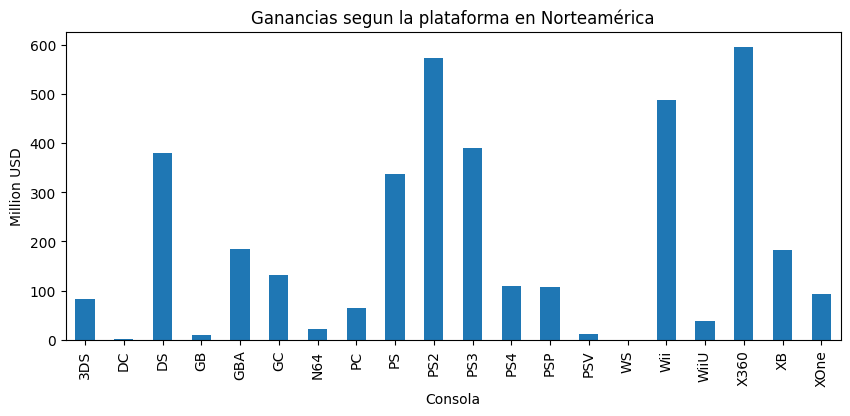

In [66]:
consolas_na.plot(kind = "bar",
                title = "Ganancias segun la plataforma en Norteamérica",
                xlabel = "Consola",
                ylabel = "Million USD",
                figsize = [10,4],
                legend = False)
plt.show()

##### Principales géneros 

In [67]:
generos_na = nuevo_df.groupby("genre")[["na_sales"]].sum()

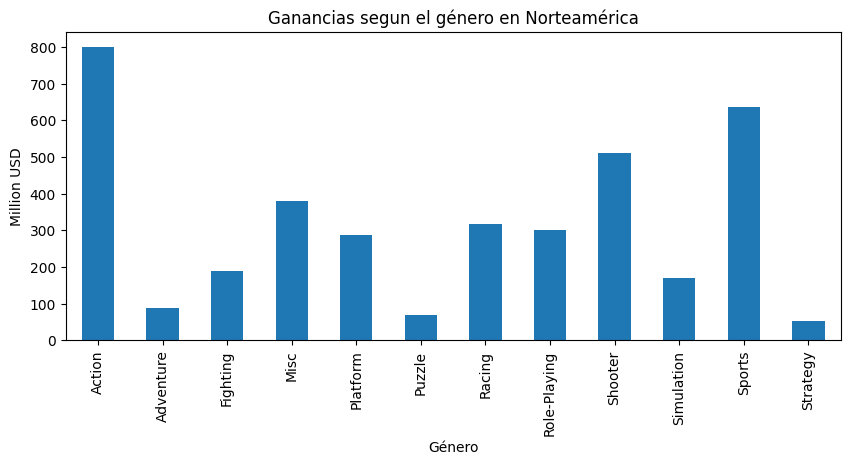

In [68]:
generos_na.plot(kind = "bar",
                title = "Ganancias segun el género en Norteamérica",
                xlabel = "Género",
                ylabel = "Million USD",
                figsize = [10,4],
                legend = False)
plt.show()

##### Relación entre las ventas y la clasificación ESRB

In [69]:
rating_na = nuevo_df.groupby("rating")[["na_sales"]].sum()

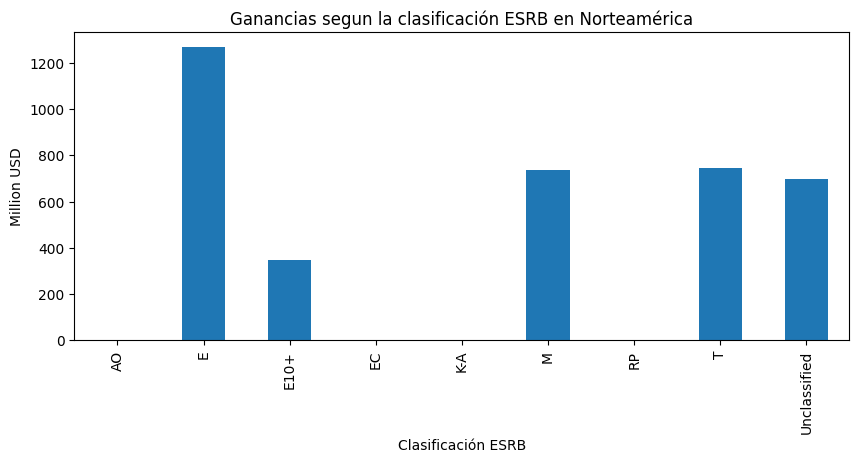

In [70]:
rating_na.plot(kind = "bar",
                title = "Ganancias segun la clasificación ESRB en Norteamérica",
                xlabel = "Clasificación ESRB",
                ylabel = "Million USD",
                figsize = [10,4],
                legend = False)
plt.show()

##### Conclusiones

Las cinco consolas más populares la región de Norteamérica son:
- Xbox 360 (X360)
- Play Station 2 (PS2)
- Wii (Wii)
- Play Station 3 (PS3)
- Nintendo DS (DS)

Los cinco género más populares en la región de Norteamérica son:
- Acción
- Deportes
- Shooters
- Miscelaneos
- Carreras

Con respecto a la relación entre las ventas y la clasificación de los títulos, se observa que se ordenan de la siguiente manera:
- Everyone (E)
- Teen (T)
- Mature (M)
- Everyone 10+ (E10+)
* Hay muchos juegos sin clasificación en la base de datos

#### Unión Europea (EU)

##### Principales plataformas

In [71]:
consolas_eu = nuevo_df.groupby("platform")[["eu_sales"]].sum()

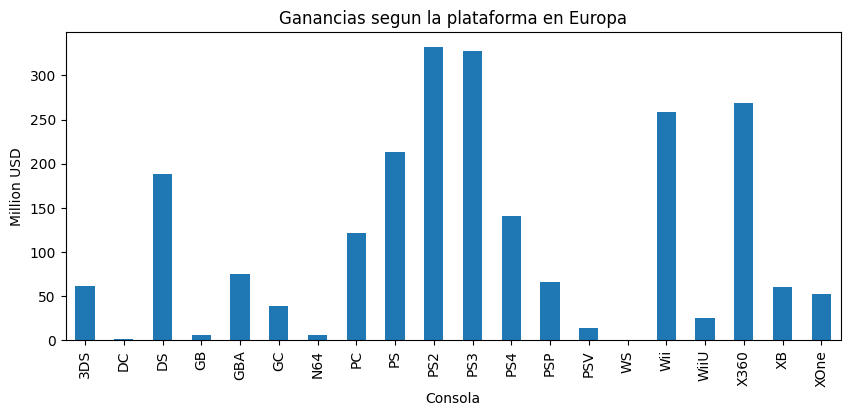

In [72]:
consolas_eu.plot(kind = "bar",
                title = "Ganancias segun la plataforma en Europa",
                xlabel = "Consola",
                ylabel = "Million USD",
                figsize = [10,4],
                legend = False)
plt.show()

##### Principales géneros

In [73]:
generos_eu = nuevo_df.groupby("genre")[["eu_sales"]].sum()

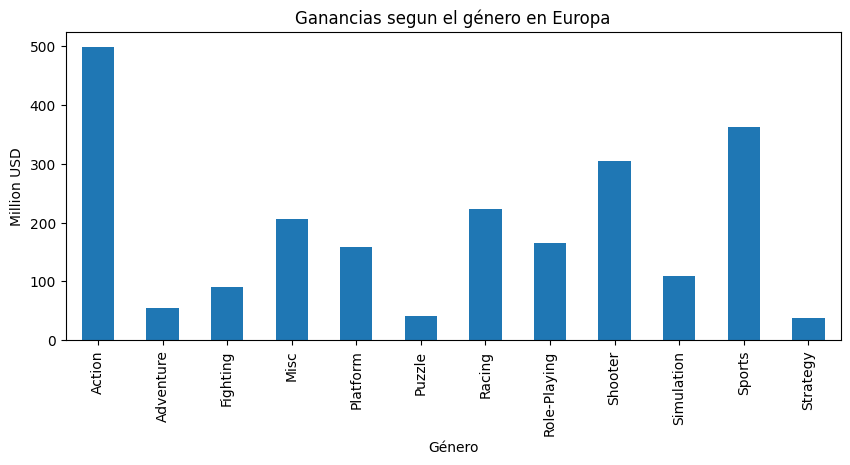

In [74]:
generos_eu.plot(kind = "bar",
                title = "Ganancias segun el género en Europa",
                xlabel = "Género",
                ylabel = "Million USD",
                figsize = [10,4],
                legend = False)
plt.show()

##### Relación entre las ventas y la clasificación ESRB

In [75]:
rating_eu = nuevo_df.groupby("rating")[["eu_sales"]].sum()

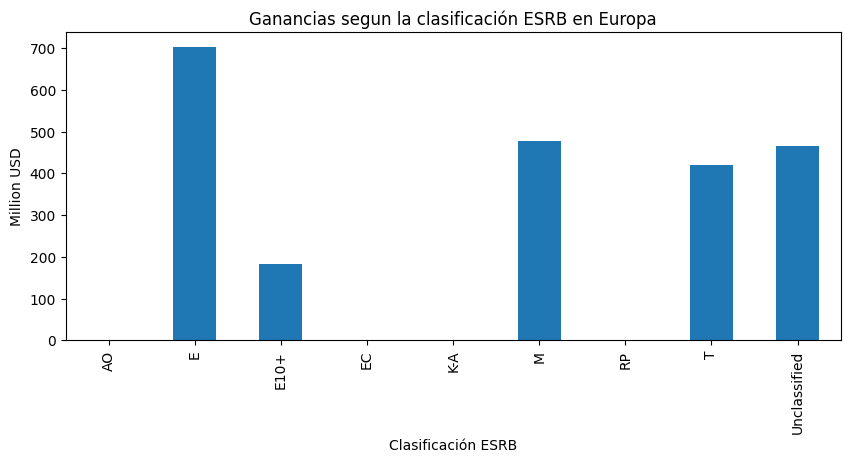

In [76]:
rating_eu.plot(kind = "bar",
                title = "Ganancias segun la clasificación ESRB en Europa",
                xlabel = "Clasificación ESRB",
                ylabel = "Million USD",
                figsize = [10,4],
                legend = False)
plt.show()

##### Conclusiones

Las cinco consolas más populares la región de Europa son:
- Play Station 2 (PS2)
- Play Station 3 (PS3)
- Xbox 360 (X360)
- Wii (Wii)
- Play Station Portable (PSP)

Los cinco género más populares en la región de Europa son:
- Acción
- Deportes
- Shooters
- Carreras
- Miscelaneos

Con respecto a la relación entre las ventas y la clasificación de los títulos, se observa que se ordenan de la siguiente manera:
- Everyone (E)
- Mature (M)
- Teen (T)
- Everyone 10+ (E10+)
* Hay muchos juegos sin clasificación en la base de datos

#### Japón (JP)

##### Principales plataformas 

In [77]:
consolas_jp = nuevo_df.groupby("platform")[["jp_sales"]].sum()

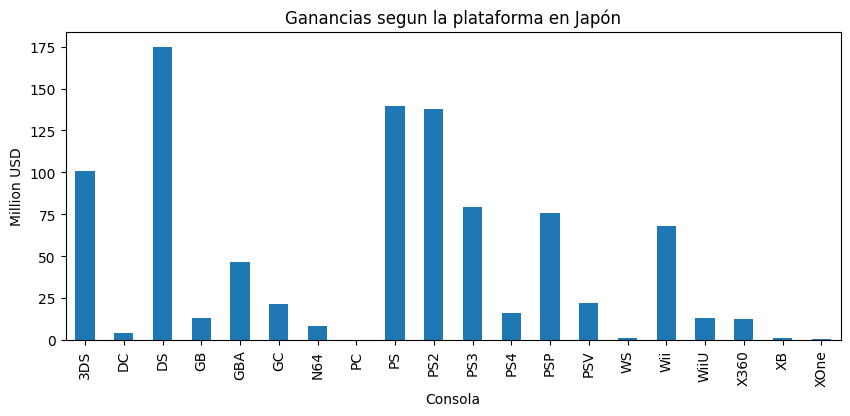

In [78]:
consolas_jp.plot(kind = "bar",
                title = "Ganancias segun la plataforma en Japón",
                xlabel = "Consola",
                ylabel = "Million USD",
                figsize = [10,4],
                legend = False)
plt.show()

##### Principales géneros

In [79]:
generos_jp = nuevo_df.groupby("genre")[["jp_sales"]].sum()

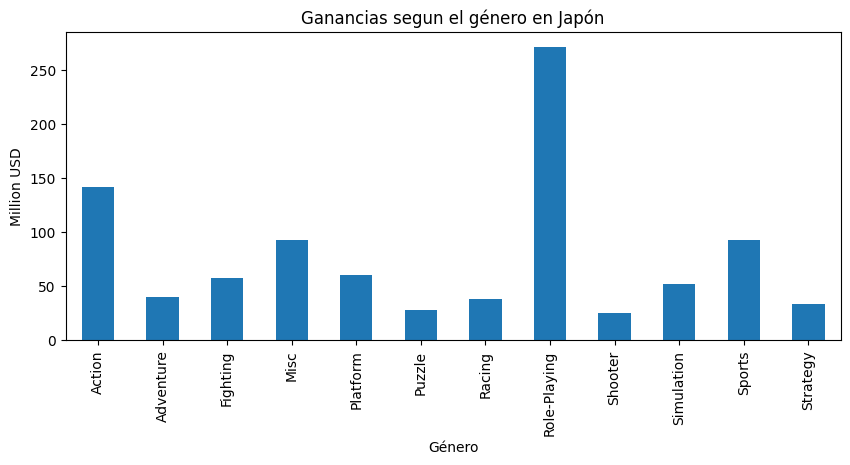

In [80]:
generos_jp.plot(kind = "bar",
                title = "Ganancias segun el género en Japón",
                xlabel = "Género",
                ylabel = "Million USD",
                figsize = [10,4],
                legend = False)
plt.show()

##### Relación entre las ventas y a clasificación ESRB

In [81]:
rating_jp = nuevo_df.groupby("rating")[["jp_sales"]].sum()

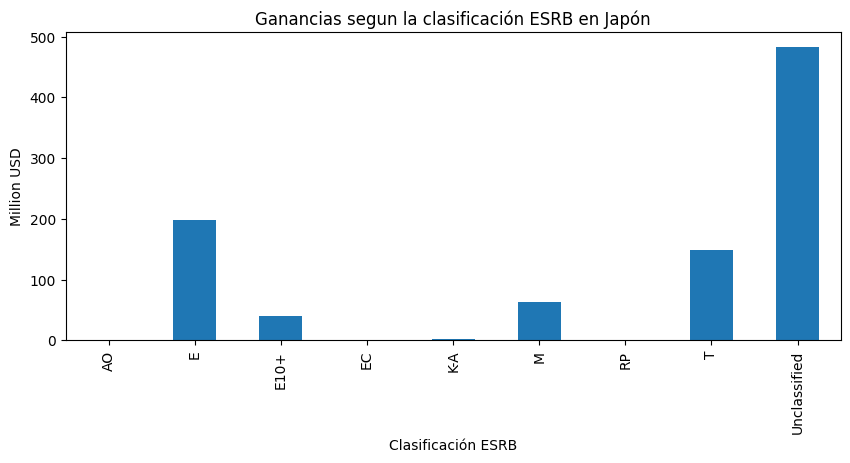

In [82]:
rating_jp.plot(kind = "bar",
                title = "Ganancias segun la clasificación ESRB en Japón",
                xlabel = "Clasificación ESRB",
                ylabel = "Million USD",
                figsize = [10,4],
                legend = False)
plt.show()

##### Conclusiones

Las cinco consolas más populares la región de Japón son:
- Nintendo DS (DS)
- Play Station (PS)
- Play Station 2 (PS2)
- Nintendo 3DS (3DS)
- Play Station 3 (PS3)

Los cinco género más populares en la región de Japón son:
- Juegos de rol
- Acción
- Deportes
- Miscelaneos
- De plataforma

Con respecto a la relación entre las ventas y la clasificación de los títulos, se observa que se ordenan de la siguiente manera:
- Everyone (E)
- Teen (T)
- Mature (M)
- Everyone 10+ (E10+)
* La mayoría de los juegos están sin clasificación en la base de datos

## Pruebas de hipótesis 

La última parte de este proyecto consiste en probar las siguientes hipótesis. Todas las pruebas serán realizadas con un nivel de significacia del 95% para asegurarnos de que los resultados sean acertados y precisos. 

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [83]:
calificaciones_xone = nuevo_df[nuevo_df["platform"]=="XOne"][["user_score"]]
media_calificacion_xone = (calificaciones_xone.sum())/(247-65)
calificaciones_xone = calificaciones_xone.replace(0.0,media_calificacion_xone)
calificaciones_xone

,user_score
1272,6.521429
1326,7.900000
1335,5.400000
1379,6.400000
1403,6.200000
...,...
14842,8.800000
14826,6.521429
14888,7.900000
14882,6.521429


In [84]:
calificaciones_pc = nuevo_df[nuevo_df["platform"]=="PC"][["user_score"]]
media_calificacion_pc = (calificaciones_pc.sum())/(917-183)
calificaciones_pc = calificaciones_pc.replace(0.0,media_calificacion_pc)
calificaciones_pc

,user_score
1263,7.6
1306,7.3
1344,4.0
1361,8.2
1414,7.9
...,...
14860,7.8
14862,8.2
14863,8.8
14868,7.6


In [85]:
print("Hipótesis nula: Las calificaciones promedio de los usuarios para las consolas Xbox One (XOne) y Personal Computer (PC) son iguales")
print("H0: media_calif_xone = media_calif_pc")
print()
print("Hipótesis alterna: Las calificaciones promedio de los usuarios para las consolas Xbox One (XOne) y Personal Computer (PC) son diferentes")
print("H1: media_calif_xone ≠ media_calif_pc")
print()
prueba_hipotesis_igualdad_consolas = st.stats.ttest_ind(calificaciones_xone,calificaciones_pc,equal_var=False)
alpha = 0.05
print("Valor P: " + str(prueba_hipotesis_igualdad_consolas.pvalue))
print()
if prueba_hipotesis_igualdad_consolas.pvalue < alpha:
    print("Se rechaza la hipótesis sobre la igualdad de las calificaciones promedio para las consolas Xbox One (XOne) y Personal Computer (PC)")
else:
    print("No se rechaza la hipótesis sobre la igualdad de las calificaciones promedio para las consolas Xbox One (XOne) y Personal Computer (PC)")

Hipótesis nula: Las calificaciones promedio de los usuarios para las consolas Xbox One (XOne) y Personal Computer (PC) son iguales
H0: media_calif_xone = media_calif_pc

Hipótesis alterna: Las calificaciones promedio de los usuarios para las consolas Xbox One (XOne) y Personal Computer (PC) son diferentes
H1: media_calif_xone ≠ media_calif_pc

Valor P: [1.00780952e-08]

Se rechaza la hipótesis sobre la igualdad de las calificaciones promedio para las consolas Xbox One (XOne) y Personal Computer (PC)


/tmp/ipykernel_51/2207469771.py:7: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  prueba_hipotesis_igualdad_consolas = st.stats.ttest_ind(calificaciones_xone,calificaciones_pc,equal_var=False)


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

In [86]:
calificaciones_action = nuevo_df[nuevo_df["genre"]=="Action"][["user_score"]]
media_calificacion_action = (calificaciones_action.sum())/(3187-1394)
calificaciones_action = calificaciones_action.replace(0.0,media_calificacion_action)
calificaciones_action

,user_score
1208,8.200000
1209,9.000000
1212,8.100000
1213,8.700000
1226,8.500000
...,...
14888,7.900000
14891,8.400000
14898,7.055549
14903,3.000000


In [87]:
calificaciones_sports = nuevo_df[nuevo_df["genre"]=="Sports"][["user_score"]]
media_calificacion_sports = (calificaciones_sports.sum())/(2139-1058)
calificaciones_sports = calificaciones_sports.replace(0.0,media_calificacion_sports)
calificaciones_sports

,user_score
1197,8.000000
1199,8.000000
1205,7.700000
1207,7.400000
1256,4.300000
...,...
14889,6.951434
14902,3.100000
14880,6.951434
14877,6.951434


In [88]:
print("Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de acción (Action) y deportes (Sports) son iguales")
print("H0: media_calif_action = media_calif_sports")
print()
print("Hipótesis alterna: Las calificaciones promedio de los usuarios para los géneros de acción (Action) y deportes (Sports) son diferentes")
print("H1: media_calif_action ≠ media_calif_sports")
print()
prueba_hipotesis_igualdad_generos = st.stats.ttest_ind(calificaciones_action,calificaciones_sports,equal_var=False)
alpha = 0.05
print("Valor P: " + str(prueba_hipotesis_igualdad_generos.pvalue))
print()
if prueba_hipotesis_igualdad_generos.pvalue < alpha:
    print("Se rechaza la hipótesis sobre la igualdad de las calificaciones promedio para los géneros de acción (Action) y deportes (Sports)")
else:
    print("No se rechaza la hipótesis sobre la igualdad de las calificaciones promedio para los géneros de acción (Action) y deportes (Sports)")

Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros de acción (Action) y deportes (Sports) son iguales
H0: media_calif_action = media_calif_sports

Hipótesis alterna: Las calificaciones promedio de los usuarios para los géneros de acción (Action) y deportes (Sports) son diferentes
H1: media_calif_action ≠ media_calif_sports

Valor P: [0.00087413]

Se rechaza la hipótesis sobre la igualdad de las calificaciones promedio para los géneros de acción (Action) y deportes (Sports)


/tmp/ipykernel_51/3092604795.py:7: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  prueba_hipotesis_igualdad_generos = st.stats.ttest_ind(calificaciones_action,calificaciones_sports,equal_var=False)


## Conclusiones 

Después de haber realizado este proyecto, se obtuvieron conclusiones importantes que puede ayudar a incrementar las ventas para la empresa Ice. Las conclusiones y recomendaciones son las siguientes:
- Es importante realizar campañas de marketing especializadas en las tres principales regiones donde se venden videojuegos:
    - En Norteamérica, los clientes suelen comprar más videojuegos de las consolas Xbox 360, Play Station 2, Wii, Nintendo DS y Play Station 3. Los géneros más consumidos son acción, deportes, shooters, miscelaneos y carreras.
    - En Europa, los compradores se decantan más por consolas como Play Sation 2, Play Station 3, Wii, Nintendo DS y Play Station Portable. Los géneros más consumidos coinciden con los de la región de Norteamérica.
    - Japón puede ser la región más diferenciada. Los clientes adquieren más videojuegos para las consolas Nintendo DS, Nintendo 3DS, Play Station, Play Station 2 y Play Station 3. Los géneros que más se consumen son juegos de rol, acción, deportes, miscelaneos y de plataforma.
- Las ventas de los videojuegos no se ven muy influenciadas por la crítica de los usuarios o profesionales. Sin embargo, existe cierto grado de correlación entre las calificaciones de los profesionales y las ventas de los videojuegos. Norteamerica y Europa tienden más a hacer caso de las críticas, mientras que en Japón son más independientes.
- Las consolas que sobresalen con mayores ventas son Play Station 2 , Xbox 360 , Play Station 3 , Wii , Nintendo DS y Play Station.